In [ ]:
# 간단하게 그림을 그릴 수 있는 mglearn 라이브러리 사용 (!pip install mglearn 명령어로 설치)
!pip install mglearn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 5.0 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=5113b8931419cdbb903bb8eca4b9e92b71c687a2809739da1bfce99408d27514
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [ ]:
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 306 kB 5.7 MB/s 
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0


In [ ]:
import mglearn

# 데이터 탐색

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%matplotlib inline
import pandas as pd
import seaborn as sns           
import matplotlib.pyplot as plt 

In [ ]:
# csv 데이터 가져오기, 가입자일련번호를 인덱스로 지정
health = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ITB/health_data.csv", index_col='가입자일련번호')

print(health.columns)
display(health.info())       
display(health.head())      

Index(['기준년도', '시도코드', '성별코드', '연령대코드(5세단위)', '신장(5Cm단위)', '체중(5Kg 단위)',
       '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압',
       '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소',
       '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부',
       '구강검진수검여부', '치아우식증유무', '치석', '데이터공개일자'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   시도코드         10000 non-null  int64  
 2   성별코드         10000 non-null  object 
 3   연령대코드(5세단위)  10000 non-null  int64  
 4   신장(5Cm단위)    10000 non-null  int64  
 5   체중(5Kg 단위)   10000 non-null  int64  
 6   허리둘레         10000 non-null  float64
 7   시력(좌)        10000 non-null  float64
 8   시력(우)        10000 non-null  float64
 9   청력(좌)        10000 non-null  int64  
 10  청력(우)        10000

None

,기준년도,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
가입자일련번호,,,,,,,,,,,,,,,,,,,,,
1,2020,36,M,9,165,60,72.1,1.2,1.5,1,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
2,2020,27,F,13,150,65,81.0,0.8,0.8,1,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
3,2020,11,F,12,155,55,70.0,0.6,0.7,1,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
4,2020,31,M,13,160,70,90.8,1.0,1.0,1,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
5,2020,41,F,12,155,50,75.2,1.5,1.2,1,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


In [ ]:
health = health.dropna(axis = 0)

In [ ]:
health.describe()  # 가입자일련번호는 인덱스로 지정되어 있으므로 id를 제외한 변수들의 기술통계 정보를 보여줌 

,기준년도,시도코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),...,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,구강검진수검여부,치아우식증유무,치석
count,1249.0,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,...,1249.000000,1249.000000,1249.000000,1249.000000,1249.00000,1249.000000,1249.000000,1249.0,1249.000000,1249.000000
mean,2020.0,33.387510,11.639712,161.737390,63.799039,82.505685,0.925620,0.904884,1.067254,1.062450,...,120.479584,14.250040,1.110488,0.881105,26.86309,26.672538,35.453163,1.0,0.164131,0.591673
std,0.0,12.372829,2.173535,8.995185,12.719186,9.844860,0.652522,0.476381,0.253739,0.245356,...,37.611498,1.537961,0.503794,0.356008,13.92527,23.392743,35.973387,0.0,0.370543,0.588180
min,2020.0,11.000000,9.000000,130.000000,30.000000,57.000000,0.100000,0.100000,1.000000,1.000000,...,19.000000,6.500000,1.000000,0.400000,8.00000,2.000000,3.000000,1.0,0.000000,0.000000
25%,2020.0,27.000000,10.000000,155.000000,55.000000,75.500000,0.700000,0.700000,1.000000,1.000000,...,95.000000,13.300000,1.000000,0.700000,20.00000,16.000000,17.000000,1.0,0.000000,0.000000
50%,2020.0,41.000000,12.000000,160.000000,65.000000,83.000000,0.900000,0.900000,1.000000,1.000000,...,120.000000,14.300000,1.000000,0.900000,24.00000,21.000000,24.000000,1.0,0.000000,1.000000
75%,2020.0,43.000000,13.000000,170.000000,70.000000,89.000000,1.000000,1.000000,1.000000,1.000000,...,146.000000,15.400000,1.000000,1.000000,29.00000,31.000000,39.000000,1.0,0.000000,1.000000
max,2020.0,49.000000,18.000000,190.000000,120.000000,121.200000,9.900000,9.900000,3.000000,3.000000,...,251.000000,18.100000,6.000000,8.700000,265.00000,477.000000,445.000000,1.0,1.000000,2.000000


Yes    802
No     447
Name: 음주여부, dtype: int64


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51020 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_te

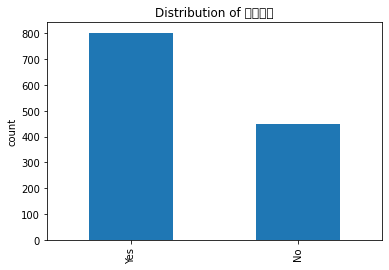

In [ ]:
print(health['음주여부'].value_counts())
health['음주여부'].value_counts().plot.bar()
plt.ylabel('count')
plt.title('Distribution of 음주여부')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54792 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50724 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54000 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54792 missing from current font.
  font.set_

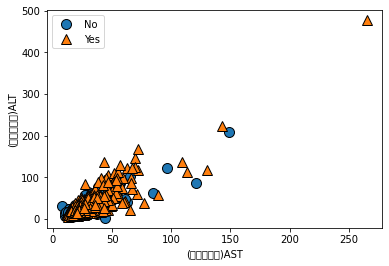

In [ ]:
mglearn.discrete_scatter(health['(혈청지오티)AST'], health['(혈청지오티)ALT'], health['음주여부'])
plt.xlabel("(혈청지오티)AST")
plt.ylabel("(혈청지오티)ALT")
plt.legend()
plt.show()

# 의사결정나무

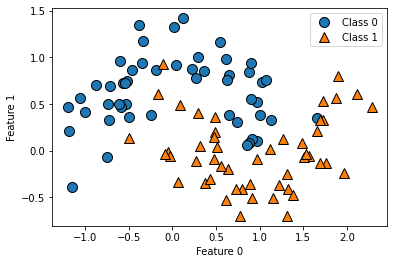

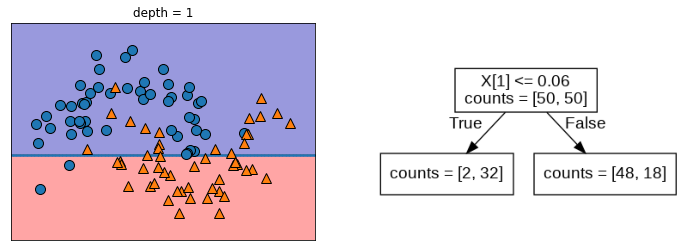

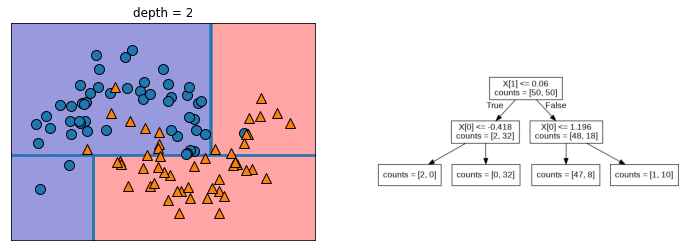

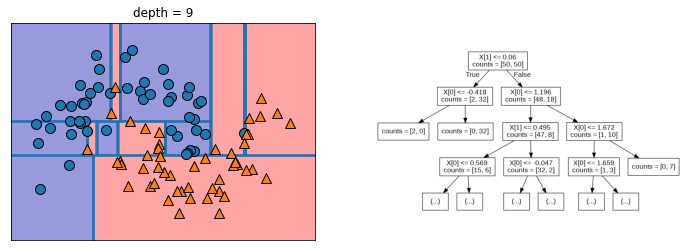

In [ ]:
# 의사결정나무 만드는 과정 
mglearn.plots.plot_tree_progressive()

In [ ]:
health['음주여부'].replace("No", 0, inplace=True)
health['음주여부'].replace("Yes", 1, inplace=True)

health['성별코드'].replace("M", 0, inplace=True)
health['성별코드'].replace("F", 1, inplace=True)

health['흡연상태'].replace("No", 0, inplace=True)
health['흡연상태'].replace("Yes", 1, inplace=True)

# [과정]
-문자형 변수 숫자형으로 변환

In [ ]:
health

,기준년도,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
가입자일련번호,,,,,,,,,,,,,,,,,,,,,
7,2020,44,0,9,165,80,93.0,0.8,0.7,1,...,0.7,18.0,20.0,35.0,1,1,1,0.0,1.0,12/29/2021
17,2020,30,0,11,160,65,90.0,0.6,0.6,1,...,1.0,29.0,54.0,24.0,0,1,1,0.0,1.0,12/29/2021
22,2020,41,1,11,155,50,65.9,0.7,1.0,1,...,0.8,24.0,14.0,12.0,0,0,1,0.0,0.0,12/29/2021
28,2020,11,0,17,155,60,82.0,0.5,0.7,1,...,1.4,33.0,22.0,29.0,0,1,1,0.0,0.0,12/29/2021
48,2020,26,0,16,165,65,94.0,1.5,0.6,2,...,1.0,28.0,20.0,43.0,0,1,1,0.0,0.0,12/29/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9955,2020,30,0,9,180,70,87.5,1.2,0.9,1,...,0.9,22.0,21.0,19.0,0,1,1,0.0,1.0,12/29/2021
9964,2020,41,1,13,160,75,107.4,0.8,0.8,1,...,0.8,20.0,15.0,14.0,0,1,1,1.0,1.0,12/29/2021
9966,2020,45,1,12,155,60,80.0,1.5,1.0,1,...,0.6,22.0,9.0,29.0,0,0,1,0.0,0.0,12/29/2021


In [ ]:
idx = health[health['흡연상태'] == "NotNow"].index     

health.drop(idx , inplace=True) # 해당 인덱스를 제거함

# [과정]
-숫자형으로 바꾸지 않은 흡연상태 중 'NotNow' 값 제거

In [ ]:
health

,기준년도,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
가입자일련번호,,,,,,,,,,,,,,,,,,,,,
7,2020,44,0,9,165,80,93.0,0.8,0.7,1,...,0.7,18.0,20.0,35.0,1,1,1,0.0,1.0,12/29/2021
17,2020,30,0,11,160,65,90.0,0.6,0.6,1,...,1.0,29.0,54.0,24.0,0,1,1,0.0,1.0,12/29/2021
22,2020,41,1,11,155,50,65.9,0.7,1.0,1,...,0.8,24.0,14.0,12.0,0,0,1,0.0,0.0,12/29/2021
28,2020,11,0,17,155,60,82.0,0.5,0.7,1,...,1.4,33.0,22.0,29.0,0,1,1,0.0,0.0,12/29/2021
48,2020,26,0,16,165,65,94.0,1.5,0.6,2,...,1.0,28.0,20.0,43.0,0,1,1,0.0,0.0,12/29/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9950,2020,41,1,15,150,55,79.0,0.7,0.8,1,...,0.9,25.0,14.0,16.0,0,0,1,0.0,0.0,12/29/2021
9951,2020,28,1,14,160,50,85.0,0.5,0.4,1,...,0.7,19.0,13.0,13.0,0,0,1,0.0,1.0,12/29/2021
9955,2020,30,0,9,180,70,87.5,1.2,0.9,1,...,0.9,22.0,21.0,19.0,0,1,1,0.0,1.0,12/29/2021


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = health.iloc[:, 1:24]  # 30개 변수 
y = health.iloc[:, 25]   # target 변수 음주상태




# 데이터셋을 학습(train)과 테스트(test) 세트로 분할
# random_state : random 으로 분할시 사용되는 난수 seed 숫자
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

tree = DecisionTreeClassifier(random_state=0)  
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 1.000
시험용 데이터 정확도: 0.627


In [ ]:
# 의사결정나무의 깊이를 4로 제한하면 시험용 데이터에 대한 성능이 향상됨 (과적합을 줄임)
# 과적합(overfitting): 학습용 데이터에 대해서만 성능이 좋고 새로운 데이터에 적용했을 경우에는 성능이 좋지 않은 경우
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.767
시험용 데이터 정확도: 0.693


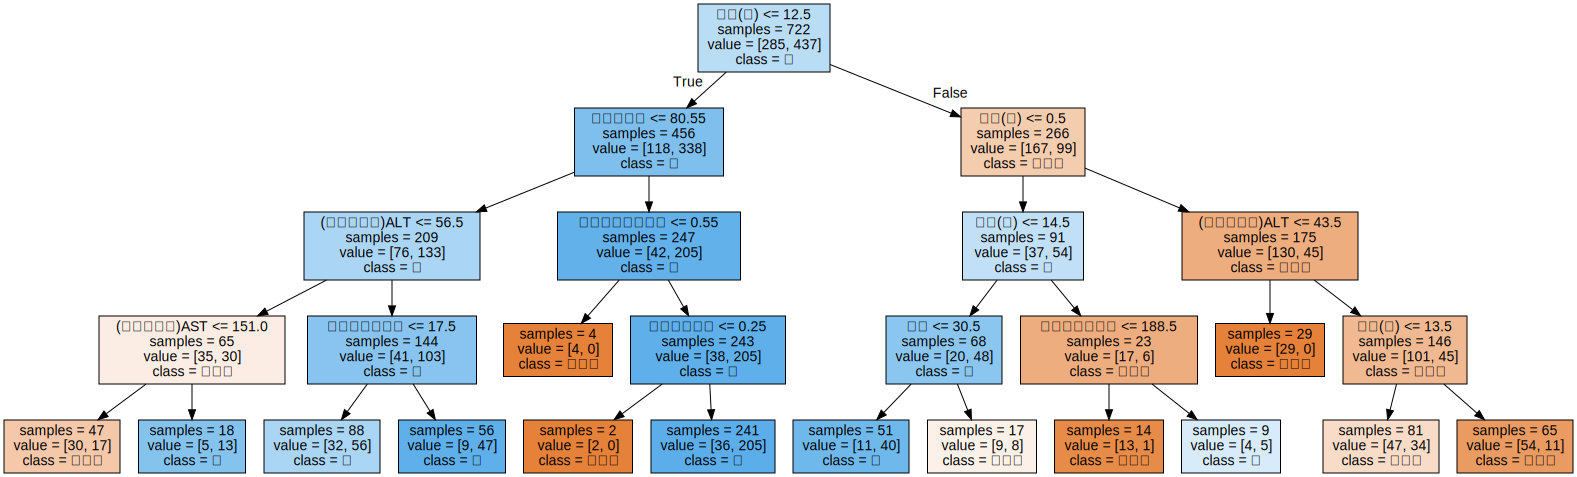

In [ ]:
#graphviz 라이브러리를 이용하여 의사결정나무 그리기 
from sklearn.tree import export_graphviz
import graphviz

# filled = True: 색상의 진하기로 클래스를 나타냄, impurity: 불순도 계산값 보여주기 옵션
export_graphviz(tree, out_file="tree.dot", class_names=[ "아니오", "네"],feature_names=health.columns[7:], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

# [인사이트] 의사결정나무 '네'로 나온 6가지 경우
-청력(좌)가 12.5 이하, 이완기혈압이 80.55 이하, (혈청지오티)ALT는 56.5 이하인데, (혈청지오티)AST가 151이 이하가 아닌 경우  
-청력(좌)가 12.5 이하, 이완기혈압이 80.55 이하인데, (혈청지오티)ALT가 56.5 이하가 아니고 데이터공개일자가 17.5  이하이거나 아니거나 상관없이 둘 다의 경우  
-청력(좌)가 12.5 이하인데, 이완기혈압이 80.55 이하가 아니고, 구강검진수검여부도 0.55 이하가 아니고, 총콜레스테롤 역시 0.25 이하가 아닌 경우  
-청력(좌)가 12.5 이하가 아닌데, 시력(우)가 0.5 이하이고, 청력(좌)도 14.5 이하이고, 치석도 30.5 이하인 경우  
-청력(좌)가 12.5 이하가 아닌데, 시력(우)가 0.5 이하이고, 청력(좌)가 14.5 이하가 아니고, 혈청크레아티닌이 188.5 이하도 아닌 경우  

In [ ]:
result = tree.feature_importances_
print("변수의 중요도:\n", result)

변수의 중요도:
 [0.         0.12394344 0.5226838  0.         0.         0.07768484
 0.         0.02627726 0.         0.         0.         0.
 0.         0.02350861 0.03097288 0.09487446 0.         0.
 0.         0.05127789 0.         0.02297606 0.02580076]


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_

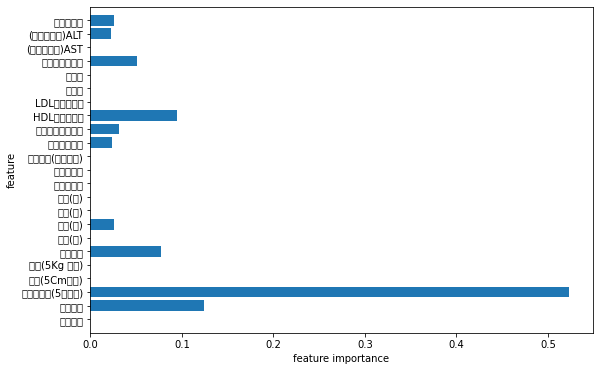

In [ ]:
import numpy as np

def plot_feature_importances_health(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(health.columns[1:24])  # 30개 
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), health.columns[1:24])   # 30개의 눈금을 표시하고 눈금 레이블을 변수 이름으로 지정
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) #Y 축 범위 지정 (-1 ~ 30)

plot_feature_importances_health(tree)

# [인사이트] 가장 중요한 변수
-가장 중요한 변수는 연령대코드(5세 단위)

In [ ]:
res = pd.DataFrame(result)
res["name"] = health.columns[7:]
display(res.info())

# perimeter_worst의 비중이 가장 큼, 루트 노드에서 이 값부터 사용 
display(res.sort_values(by='name'))  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       23 non-null     float64
 1   name    23 non-null     object 
dtypes: float64(1), object(1)
memory usage: 496.0+ bytes


None

,0,name
15,0.094874,(혈청지오티)ALT
14,0.030973,(혈청지오티)AST
9,0.000000,HDL콜레스테롤
10,0.000000,LDL콜레스테롤
16,0.000000,감마지티피
19,0.051278,구강검진수검여부
22,0.025801,데이터공개일자
4,0.000000,수축기혈압
1,0.123943,시력(우)
0,0.000000,시력(좌)


# 그래디언트 부스팅

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# 기본값은 max_depth= 3, n_estimators=100, learning_rate = 0.1

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [ ]:
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.903
시험용 데이터 세트 정확도: 0.676


In [ ]:
#나무 깊이 제한
gbrt = GradientBoostingClassifier(random_state=0, max_depth=2)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.817
시험용 데이터 세트 정확도: 0.676


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_

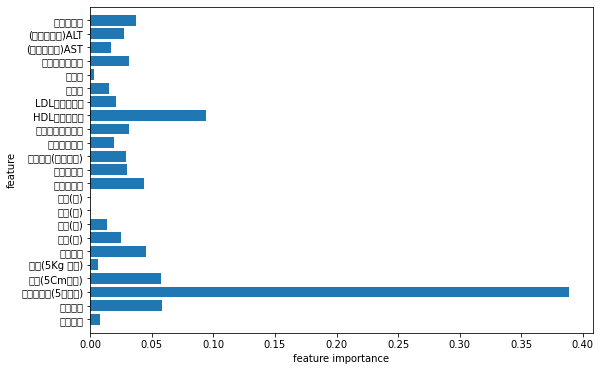

In [ ]:
plot_feature_importances_health(gbrt)

# [인사이트] 가장 중요한 변수
-가장 중요한 변수는 연령대코드(5세 단위)

In [ ]:
#학습률 감소
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.759
시험용 데이터 세트 정확도: 0.714


# 그리드 서치 (Grid Search)

In [ ]:
from sklearn.model_selection import GridSearchCV

# 파라미터를 dictionary 형태로 설정
parameters = {'max_depth':[1,2,3], 'learning_rate':[0.1,0.08]}

In [ ]:
# param_grid의 파라미터들을 3개의 fold 로 나누어 검증
# refit=True (기본값): 가장 좋은 파라미터 설정으로 재학습  
init_gbrt = GradientBoostingClassifier(random_state=0)
grid_gbrt = GridSearchCV(init_gbrt, param_grid=parameters, cv=3, refit=True)
print(grid_gbrt)
# 파라미터들을 순차적으로 학습, 검증
grid_gbrt.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_gbrt.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.1, 0.08], 'max_depth': [1, 2, 3]})


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'learning_rate': 0.1, 'max_depth': 1}",0.716038,1,0.721992,0.730290,0.695833
1,"{'learning_rate': 0.1, 'max_depth': 2}",0.689713,4,0.684647,0.721992,0.662500
2,"{'learning_rate': 0.1, 'max_depth': 3}",0.673133,6,0.643154,0.701245,0.675000
3,"{'learning_rate': 0.08, 'max_depth': 1}",0.716033,2,0.726141,0.730290,0.691667
4,"{'learning_rate': 0.08, 'max_depth': 2}",0.699447,3,0.680498,0.717842,0.700000
5,"{'learning_rate': 0.08, 'max_depth': 3}",0.675870,5,0.643154,0.730290,0.654167


In [ ]:
print('GridSearchCV 최적 파라미터:', grid_gbrt.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_gbrt.best_score_))

GridSearchCV 최적 파라미터: {'learning_rate': 0.1, 'max_depth': 1}
GridSearchCV 최고 정확도: 0.7160


# [인사이트] 최적 파라미터, 최고 정확도
-최적 파라미터는 {'learning_rate': 0.1, 'max_depth': 1} 이고, 최고 정확도는 0.7160 이다.

In [ ]:
# 최적 파라미터로 학습이 된 모델을 이용하여 시험용 데이터 세트 분류
print("시험용 데이터 세트 정확도: {:.3f}".format(grid_gbrt.score(X_test, y_test)))

시험용 데이터 세트 정확도: 0.714
